In [169]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder

In [179]:
wc=pd.read_csv('Wholesale Customer.csv')
wc.head(10)

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185
5,6,Retail,Other,9413,8259,5126,666,1795,1451
6,7,Retail,Other,12126,3199,6975,480,3140,545
7,8,Retail,Other,7579,4956,9426,1669,3321,2566
8,9,Hotel,Other,5963,3648,6192,425,1716,750
9,10,Retail,Other,6006,11093,18881,1159,7425,2098


In [6]:
wc.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [135]:
# Which Region and which Channel seems to spend more?
Which Region and which Channel seems to spend less?

wc= wc[['Channel','Region','Fresh', 'Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]
wc['spend']=wc.sum(axis=1)
wc.sort_values(by='spend',ascending=False).head(1)



,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,spend
85,Retail,Other,16117,46197,92780,1026,40827,2944,199891


In [174]:
wc.std()

Fresh               12647.328865
Milk                 7380.377175
Grocery              9503.162829
Frozen               4854.673333
Detergents_Paper     4767.854448
Delicatessen         2820.105937
spend               26356.301730
dtype: float64

In [178]:
wc.mean()

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
spend               33226.136364
dtype: float64

In [136]:
# Which Region and which Channel seems to spend less?
wc.sort_values(by='spend').head(1)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen,spend
154,Hotel,Other,622,55,137,75,7,8,904


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a4333c1d0>,
      dtype=object)

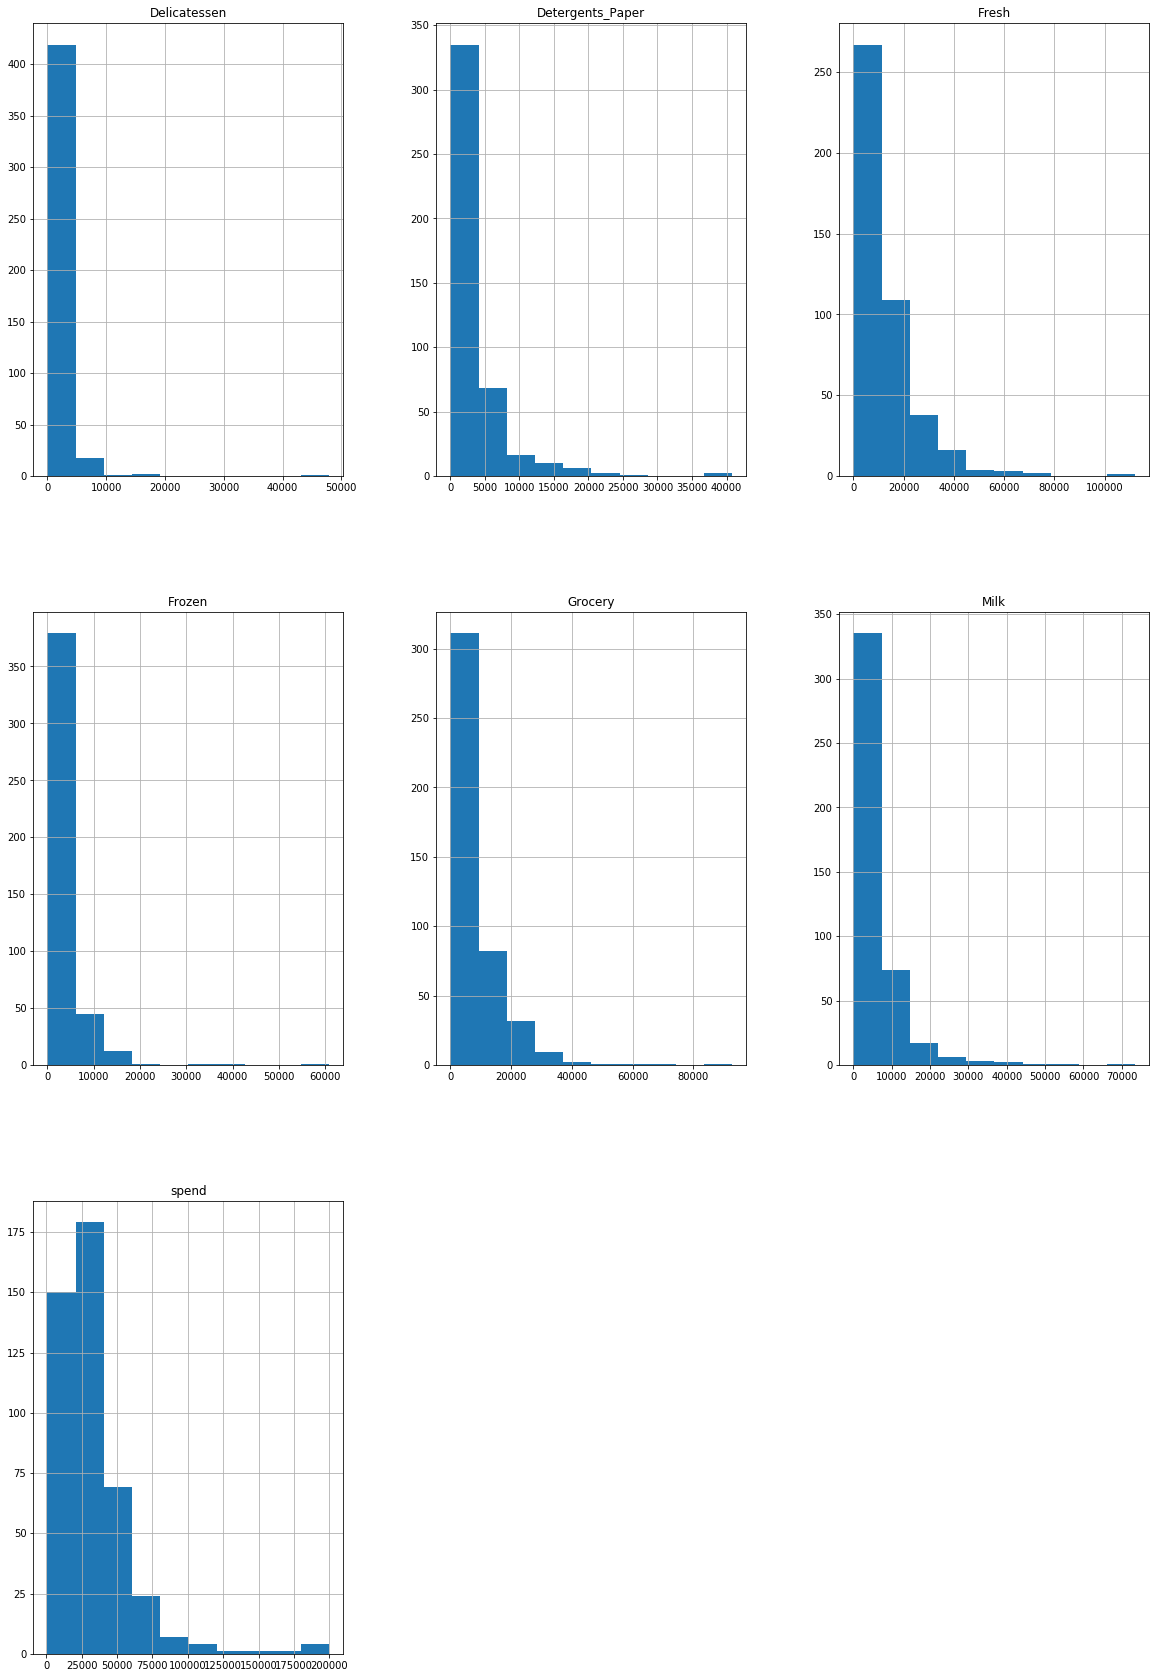

In [172]:
# There are 6 different varieties of items are considered.
# Do all varieties show similar behaviour across Region and Channel
wc.hist(figsize=(20,30))

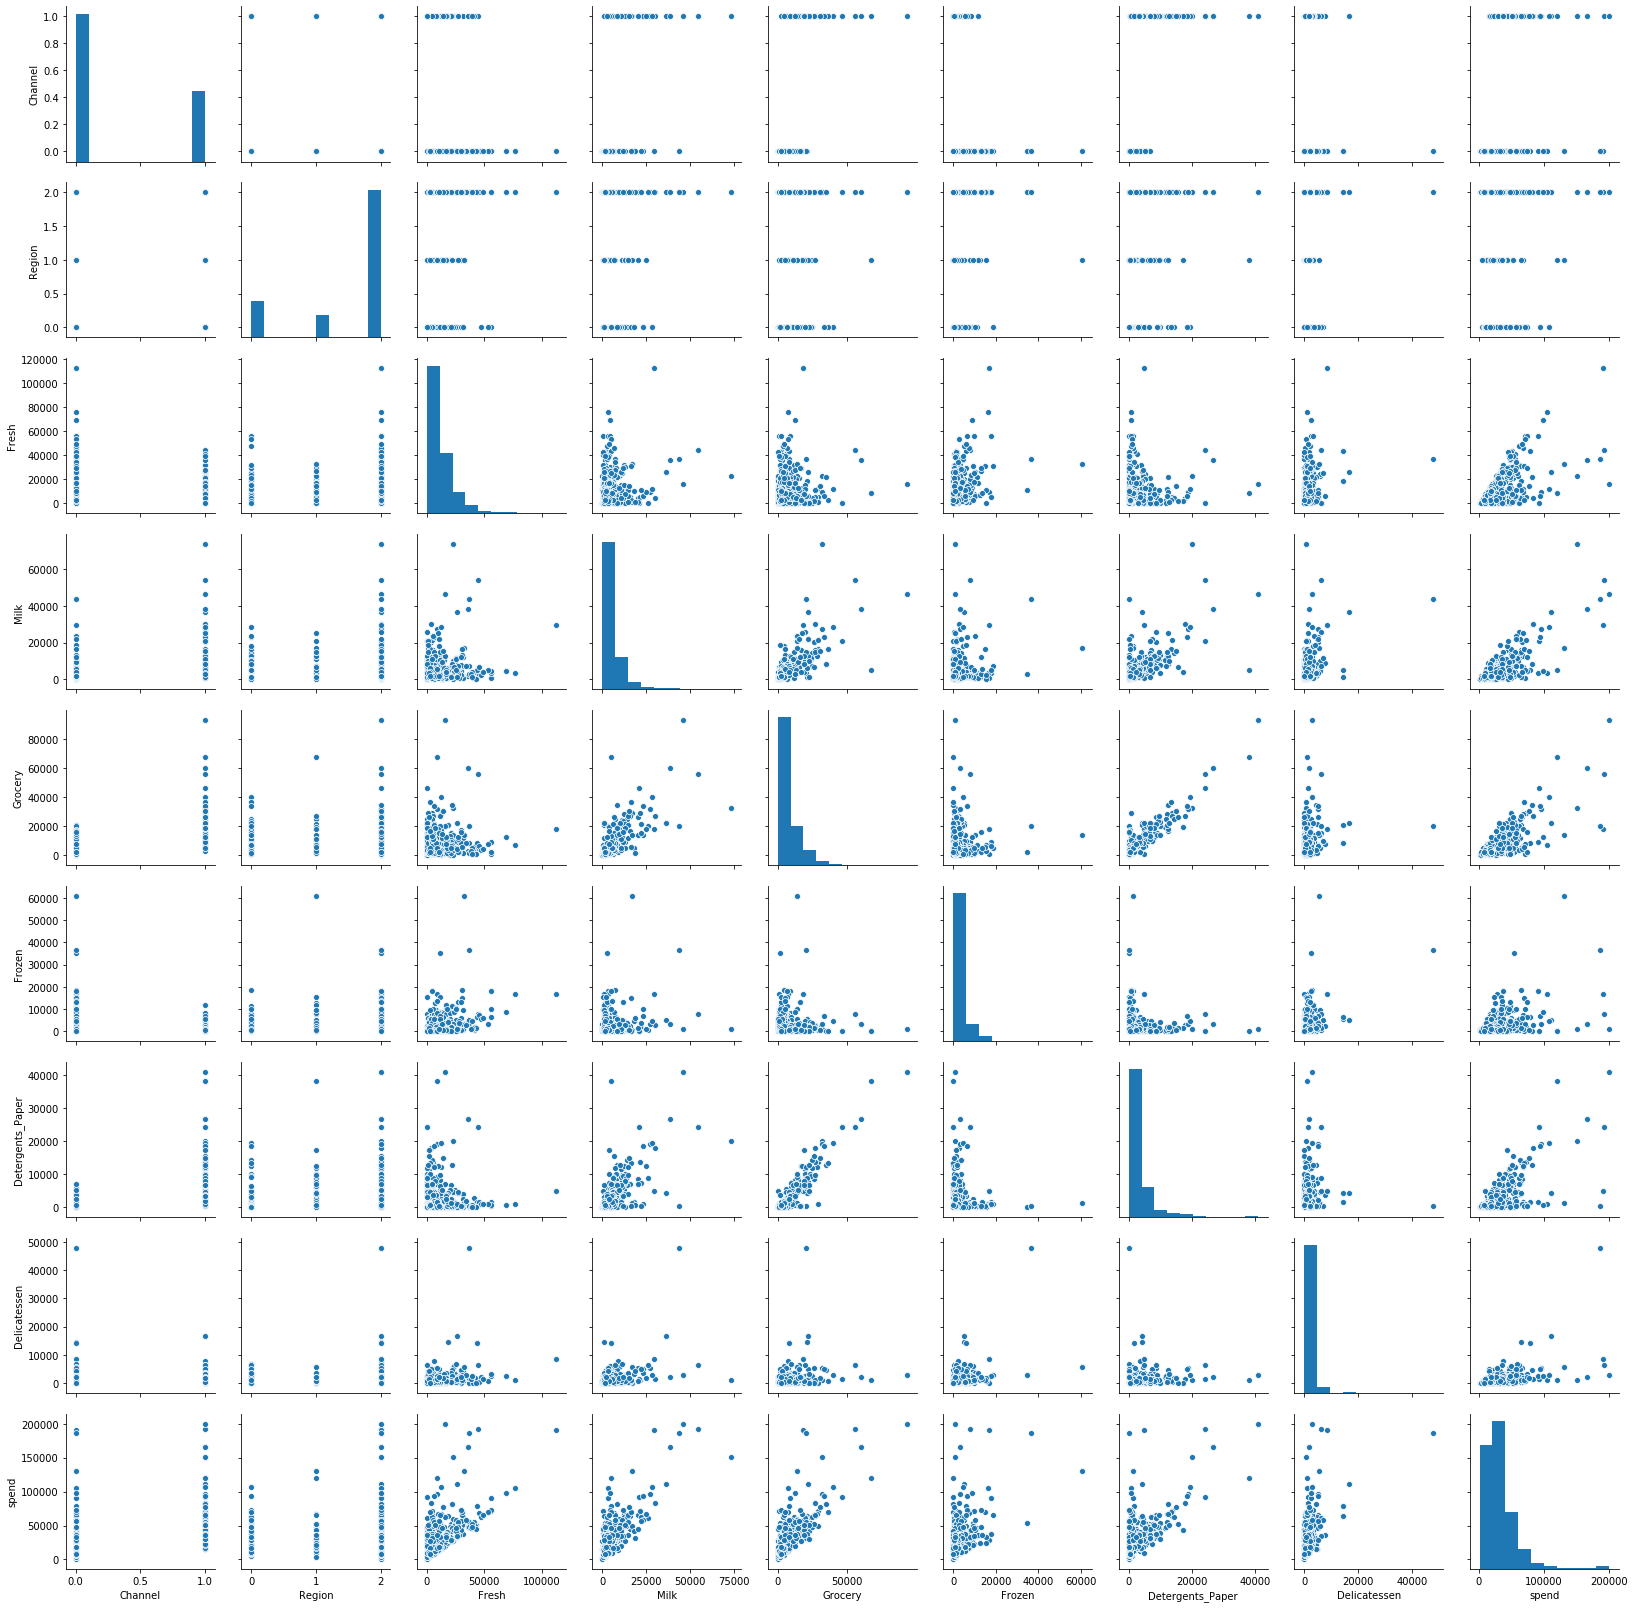

In [173]:
df_encoded = copy.deepcopy(wc)
df_encoded.loc[:,['Region','Channel']] = df_encoded.loc[:,['Region','Channel']].apply(LabelEncoder().fit_transform) 
sns.pairplot(df_encoded)  #pairplot
plt.show()

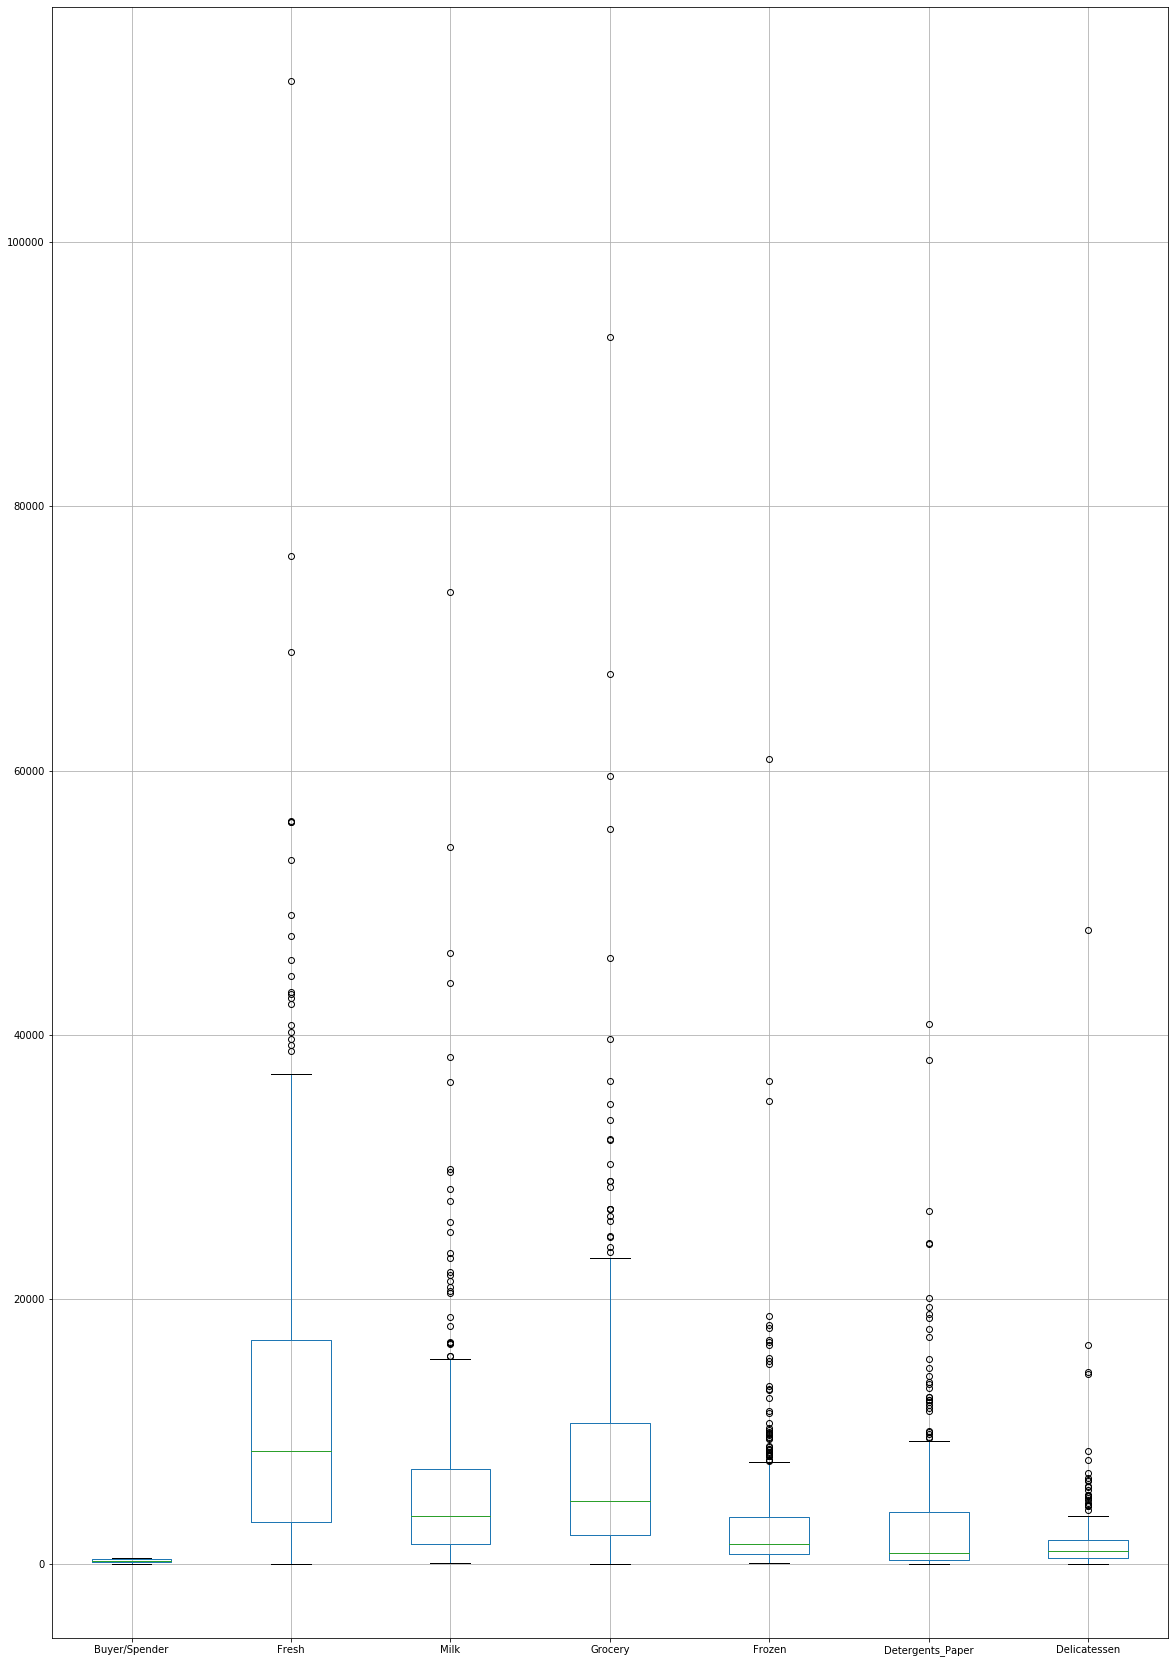

In [180]:
wc.boxplot(figsize=(20,30))

# # Second Question

For this data, construct the following contingency tables (Keep Gender as row variable)

In [191]:
import matplotlib as plt 
survey=pd.read_csv('Survey.csv')
survey.head(10)

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
5,6,Female,22,Senior,Economics/Finance,Undecided,2.3,Unemployed,78.0,3,2,700,Laptop,30
6,7,Female,21,Junior,Other,Undecided,3.0,Part-Time,50.0,1,3,500,Laptop,50
7,8,Female,22,Senior,Other,Undecided,3.1,Full-Time,80.0,1,2,200,Tablet,300
8,9,Female,20,Junior,Management,Yes,3.6,Unemployed,30.0,0,4,500,Laptop,400
9,10,Female,21,Senior,Economics/Finance,Undecided,3.3,Part-Time,37.5,1,4,200,Laptop,100


In [182]:
survey.describe()
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 18 columns):
ID                   62 non-null int64
Gender               62 non-null object
Age                  62 non-null int64
Class                62 non-null object
Major                62 non-null object
Grad Intention       62 non-null object
GPA                  62 non-null float64
Employment           62 non-null object
Salary               62 non-null float64
Social Networking    62 non-null int64
Satisfaction         62 non-null int64
Spending             62 non-null int64
Computer             62 non-null object
Text Messages        62 non-null int64
count                62 non-null int64
male                 62 non-null int64
intent               62 non-null int64
Laptop               62 non-null int64
dtypes: float64(2), int64(10), object(6)
memory usage: 8.8+ KB


In [22]:
#Gender and Major
pd.crosstab(survey['Gender'],survey['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


In [23]:
#Gender and Grad Intention
pd.crosstab(survey['Gender'],survey['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [24]:
# Gender and Employment
pd.crosstab(survey['Gender'],survey['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


In [3]:
#Gender and Computer
pd.crosstab(survey['Gender'],survey['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


## Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following questions

In [183]:
#What is the probability that a randomly selected CMSU student will be male?
#Formula for calculating this is no of male students/total no of students

maleCount=survey[survey['Gender']=='Male']['Gender'].count()
totalCount=survey['Gender'].count()
probabilityOfMale=maleCount/totalCount
probabilityOfMale


0.46774193548387094

In [14]:
#What is the probability that a randomly selected CMSU student will be female?
#Formula for calculating this is no of female students/total no of students

femaleCount=survey[survey['Gender']=='Female']['Gender'].count()
totalCount=survey['Gender'].count()
probabilityOfFemale=femaleCount/totalCount
probabilityOfFemale

0.532258064516129

In [187]:
#Find the conditional probability of different majors among the male students in CMSU
survey['count']=1
# survey['male']=np.where(survey['Gender']=='Male',1,0)
survey=survey[['Gender','Major','count']]
survey.head(3)
pd.pivot_table(survey,values='count',index=['Major'],columns=['Gender'],aggfunc=np.size,fill_value=0)


/Users/dineshkumar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Gender,Female,Male
Major,,
Accounting,3,4
CIS,3,1
Economics/Finance,7,4
International Business,4,2
Management,4,6
Other,3,4
Retailing/Marketing,9,5
Undecided,0,3


In [28]:
#For Accounting major 3+3+7+4+4+3+9+0
pofA= (3+4)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(4+1+4+2+6+4+5+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=4/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.13793103448275862

In [30]:
#For Economics/Finance major
pofA= (7+4)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(4+1+4+2+6+4+5+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=4/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.13793103448275862

In [188]:
#For CIS major
pofA= (3+1)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(4+1+4+2+6+4+5+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=1/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.034482758620689655

In [31]:
#International Business
pofA= (4+2)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(4+1+4+2+6+4+5+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=2/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.06896551724137931

In [32]:
#Management
pofA= (4+6)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(4+1+4+2+6+4+5+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=6/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.20689655172413793

In [33]:
#Other
pofA= (3+4)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(4+1+4+2+6+4+5+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=4/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.13793103448275862

In [34]:
#Retailing/Marketing	
pofA= (9+5)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(4+1+4+2+6+4+5+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=5/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.1724137931034483

In [35]:
#Undecided
pofA= (0+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(4+1+4+2+6+4+5+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=3/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.10344827586206896

In [36]:
#Find the conditional probability of different majors among the female students in CMSU
#For Accounting major
pofA= (3+4)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(3+3+7+4+4+3+9+0)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=3/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.09090909090909091

In [37]:
#For Economics/Finance major
pofA= (7+4)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(3+3+7+4+4+3+9+0)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=7/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.21212121212121213

In [38]:
#For CIS major
pofA= (3+1)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(3+3+7+4+4+3+9+0)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=3/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.09090909090909091

In [39]:
#International Business
pofA= (4+2)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(3+3+7+4+4+3+9+0)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=4/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.12121212121212122

In [40]:
#Management
pofA= (4+6)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(3+3+7+4+4+3+9+0)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=4/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.12121212121212122

In [41]:
#Other
pofA= (3+4)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(3+3+7+4+4+3+9+0)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=3/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.09090909090909091

In [42]:
#Retailing/Marketing	
pofA= (9+5)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(3+3+7+4+4+3+9+0)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=9/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.27272727272727276

In [43]:
#Undecided
pofA= (0+3)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofB=(3+3+7+4+4+3+9+0)/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAonB=0/(3+4+3+1+7+4+4+2+4+6+3+4+9+5+0+3)
pofAwenB=pofAonB/pofB
pofAwenB

0.0

# Find the conditional probability of intent to graduate, given that the student is a male

In [48]:
survey['count']=1
survey['male']=np.where(survey['Gender']=='Male',1,0)
survey['intent']=np.where(survey['Grad Intention']=='Yes',1,0)
pd.pivot_table(
    survey, 
    values='count', 
    index=['intent'], 
    columns=['Gender'], 
    aggfunc=np.size, 
    fill_value=0
)

Gender,Female,Male
intent,,
0,22,12
1,11,17


In [17]:
pofA= (11+17)/(11+17+22+12)
pofB=(12+17)/(11+17+22+12)
pofAonB=17/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.5862068965517241

In [50]:
#Find the conditional probability of intent to graduate, given that the student is a female

pofA= (11+17)/(11+17+22+12)
pofB=(22+11)/(11+17+22+12)
pofAonB=11/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.33333333333333337

In [52]:
#2.2.4. Find the conditional probability of employment status for the male students as well as for the female students.
survey['count']=1
pd.pivot_table(
    survey, 
    values='count', 
    index=['Employment'], 
    columns=['Gender'], 
    aggfunc=np.size, 
    fill_value=0
)

Gender,Female,Male
Employment,,
Full-Time,3,7
Part-Time,24,19
Unemployed,6,3


In [54]:
#Full Time Male
pofA= (3+7)/(3+7+24+19+6+3)
pofB=(7+19+3)/(3+7+24+19+6+3)
pofAonB=7/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.2413793103448276

In [58]:
#Part Time Male
pofA= (24+19)/(3+7+24+19+6+3)
pofB=(7+19+3)/(3+7+24+19+6+3)
pofAonB=19/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.6551724137931035

In [56]:
#Unemployed Male
pofA= (6+3)/(3+7+24+19+6+3)
pofB=(7+19+3)/(3+7+24+19+6+3)
pofAonB=3/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.10344827586206896

In [57]:
#Full Time Female
pofA= (3+7)/(3+7+24+19+6+3)
pofB=(3+24+6)/(3+7+24+19+6+3)
pofAonB=3/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.09090909090909091

In [60]:
#Part Time Female
pofA= (24+19)/(3+7+24+19+6+3)
pofB=(3+24+6)/(3+7+24+19+6+3)
pofAonB=24/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.7272727272727273

In [61]:
#Part Time Female
pofA= (6+3)/(3+7+24+19+6+3)
pofB=(3+24+6)/(3+7+24+19+6+3)
pofAonB=6/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.18181818181818182

In [65]:
#2.2.5. Find the conditional probability of laptop preference among the male students as well as among the female students.
survey['count']=1
survey['Laptop']=np.where(survey['Computer']=='Laptop',1,0)
pd.pivot_table(
    survey, 
    values='count', 
    index=['Laptop'], 
    columns=['Gender'], 
    aggfunc=np.size, 
    fill_value=0
)

Gender,Female,Male
Laptop,,
0,4,3
1,29,26


In [66]:
#male students
pofA= (29+26)/(4+3+29+26)
pofB=(3+26)/(4+3+29+26)
pofAonB=26/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.8965517241379312

In [67]:
#female students.
pofA= (29+26)/(4+3+29+26)
pofB=(4+29)/(4+3+29+26)
pofAonB=29/(11+17+22+12)
pofAwenB=pofAonB/pofB
pofAwenB

0.8787878787878788

In [192]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(survey.Salary),stats.skew(survey.Spending),stats.skew(survey['Text Messages'])]},
                        index=['Salary','Spending','Text Messages'])  
Skewness

,Skewness
Salary,0.521677
Spending,1.547285
Text Messages,1.264245


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a3cd2ba50>,
      dtype=object)

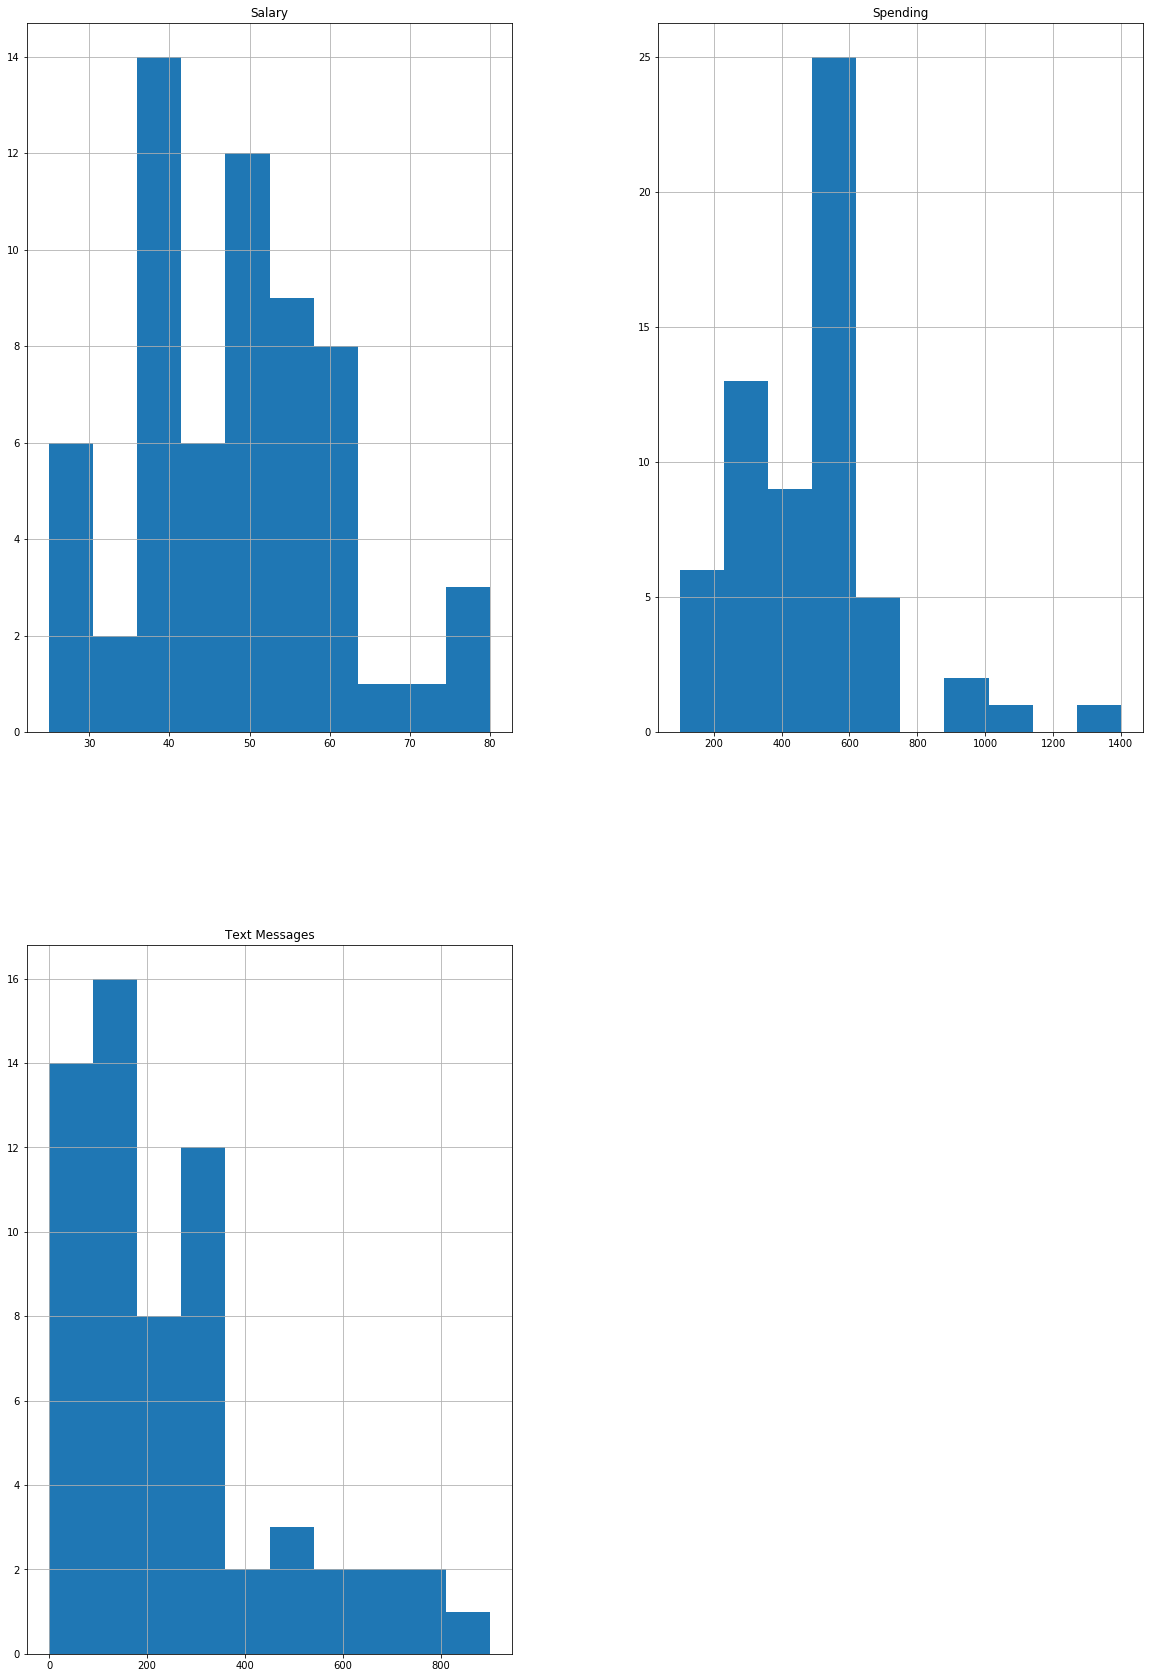

In [193]:
survey[['Salary','Spending','Text Messages']].hist(figsize=(20,30))

In [105]:
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro,wilcoxon
from statsmodels.stats.power import ttest_power

In [194]:
# For the A shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.
shingels=pd.read_csv('A+&+B+shingles.csv')
shingels.head(10)
shingels.describe()
# shingels.hist()
# shingels[shingels['B'].isna()]=shingels['B'].mean()
# ttest_ind(shingels['A'],shingels['B'])
# wilcoxon(shingels['A']-5)
# shingels[shingels['B'].isna()]=shingels['B'].mean()
shingels.dropna(inplace=True)
ttest_1samp(shingels['A'],0.35)

Ttest_1sampResult(statistic=-1.6005252585398313, pvalue=0.11996170801033942)

In [195]:
#For the B shingles, form the null and alternative hypothesis to test whether the population mean moisture content is less than 0.35 pound per 100 square feet.
ttest_1samp(shingels['B'],0.35)

Ttest_1sampResult(statistic=-3.1003313069986995, pvalue=0.004180954800638363)

In [114]:
#Do you think that the population means for shingles A and B are equal?
ttest_ind(shingels['A'],shingels['B'])

Ttest_indResult(statistic=0.985249977839441, pvalue=0.3284577916404776)